# Signature Matrix Heat Map

aedavids@ucsc.edu  
6/18/2024  

Copyright (c) 2020-2023, Regents of the University of California All rights reserved. https://polyformproject.org/licenses/noncommercial/1.0.0



In [1]:
import ipynbname

# use display() to print an html version of a data frame
# useful if dataFrame output is not generated by last like of cell
from IPython.display import display

import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
# display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import sys

/data/tmp/ipykernel_615383/693564914.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# setting the python path allows us to run python scripts from using
# the CLI. 
PYTHONPATH = os.environ['PYTHONPATH']
print("ORIG_PYTHONPATH: {}\n".format(PYTHONPATH))

gitRepoRoot = !git rev-parse --show-toplevel
gitRepoRoot = gitRepoRoot[0]

#
# add deconvolutionAnalysis modules
#
deconvolutionModules = f'{gitRepoRoot}/deconvolutionAnalysis/python'
print("deconvolutionModules: {}\n".format(deconvolutionModules))

PYTHONPATH = PYTHONPATH + f':{deconvolutionModules}'
#print("PYTHONPATH: {}\n".format(PYTHONPATH))

sys.path.append( str(deconvolutionModules) )
#print("\nsys.path:\n{}\n".format(sys.path))

#
# add intraExtraRNA_POC modules
#
# intraExtraRNA_POCModules = f'{gitRepoRoot}/intraExtraRNA_POC/python/src'
# print("intraExtraRNA_POCModules: {}\n".format(intraExtraRNA_POCModules))

# PYTHONPATH = PYTHONPATH + f':{intraExtraRNA_POCModules}'
# #print("PYTHONPATH: {}\n".format(PYTHONPATH))

# sys.path.append( str(intraExtraRNA_POCModules) )
# #print("\nsys.path:\n{}\n".format(sys.path))

ORIG_PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src

deconvolutionModules: /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/python



In [3]:
from pipeline.dataFactory.utilities import urlify

In [4]:
notebookName = ipynbname.name()
notebookPath = ipynbname.path()
notebookDir = os.path.dirname(notebookPath)

outDir = f'{notebookDir}/{notebookName}.out'
os.makedirs(outDir, exist_ok=True)
print(f'outDir:\n{outDir}')

imgOut = f'{outDir}/img'
os.makedirs(imgOut, exist_ok=True)
print(f'\nimgOut :\n{imgOut}')

outDir:
/private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out

imgOut :
/private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out/img


In [5]:
# runName = "best10CuratedDegree1_ce467ff"
# weird = "best10CuratedDegree1"

runName = "best10CuratedDegree1"
rootDir = "/private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category"
# runOutDir = f'{rootDir}/{runName}/training/{weird}.sh.out'
runOutDir = f'{rootDir}/{runName}/training/{runName}.sh.out'
ciberSortInput = "GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-10/ciberSortInput"

In [6]:
signatureGenesPath = f'{runOutDir}/{ciberSortInput}/signatureGenes.tsv'
print(f'signatureGenesPath \n{signatureGenesPath} \n')
signatureGenesDF = pd.read_csv(signatureGenesPath, sep="\t", index_col="name")
print(f'signatureGenesDF.shape : {signatureGenesDF.shape}')
print(f'max : {signatureGenesDF.max().max()}')
print(f'min : {signatureGenesDF.min().min()}')

display( signatureGenesDF.describe() )

signatureGenesDF.head()

signatureGenesPath 
/private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category/best10CuratedDegree1/training/best10CuratedDegree1.sh.out/GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-10/ciberSortInput/signatureGenes.tsv 

signatureGenesDF.shape : (714, 83)
max : 6081155.281834357
min : 0.0


,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleus_accumbens_basal_ganglia,Brain_Putamen_basal_ganglia,Brain_Spinal_cord_cervical_c-1,Brain_Substantia_nigra,Breast_Mammary_Tissue,CESC,CHOL,COAD,Cells_Cultured_fibroblasts,Cells_EBV-transformed_lymphocytes,Cervix_Endocervix,Colon_Sigmoid,Colon_Transverse,DLBC,ESCA,Esophagus_Gastroesophageal_Junction,Esophagus_Mucosa,Esophagus_Muscularis,GBM,HNSC,Heart_Atrial_Appendage,Heart_Left_Ventricle,KICH,KIRC,KIRP,Kidney_Cortex,LGG,LIHC,LUAD,LUSC,Liver,Lung,MESO,Minor_Salivary_Gland,Muscle_Skeletal,Nerve_Tibial,OV,Ovary,PAAD,PCPG,PRAD,Pancreas,Pituitary,Prostate,READ,SARC,SKCM,STAD,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,TGCT,THCA,THYM,Testis,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood
count,7.140000e+02,714.000000,714.000000,7.140000e+02,714.000000,714.000000,714.000000,7.140000e+02,7.140000e+02,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,714.000000,714.000000,714.000000,7.140000e+02,714.000000,7.140000e+02,714.000000,714.000000,714.000000,714.000000,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,7.140000e+02,714.000000,714.000000,7.140000e+02,7.140000e+02,714.000000,7.140000e+02,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,714.000000,7.140000e+02,714.000000,7.140000e+02,714.000000,7.140000e+02,714.000000,714.000000,714.000000,7.140000e+02,714.000000,7.140000e+02,714.000000,714.000000,7.140000e+02
mean,1.962407e+04,8222.134405,7753.385992,1.223503e+04,3935.598938,5443.766806,4819.089638,1.346136e+04,1.793554e+04,6959.637211,1.152389e+04,1.379600e+04,1.445063e+04,10386.534262,8425.665755,1.269702e+04,1.164661e+04,1.229964e+04,1.434883e+04,1.354127e+04,1.292077e+04,7.923342e+03,1.034365e+04,8101.892223,1.435036e+04,1.110270e+04,1.321500e+04,6346.904048,10137.082106,5069.792313,7832.993055,1.406482e+04,9064.762851,3.516409e+04,8797.738364,5286.851613,8130.526593,9189.935382,11538.557320,1.323412e+04,1.261162e+04,4.137041e+04,2.371632e+04,2.145545e+04,1.524259e+04,1.960101e+04,9.168689e+03,1.385891e+04,13467.291458,7.342998e+03,5731.107868,10775.589180,1.124293e+04,1.050792e+04,6270.374097,3.132805e+04,5097.128573,1.361809e+04,1.909223e+04,1.646531e+04,1.308442e+04,1.173899e+04,7911.258934,13416.129148,3.895147e+04,1.648911e+04,3.504111e+04,7098.575494,6984.589484,9.459845e+03,6648.917966,1.462437e+04,11335.575457,2.311750e+04,12654.069951,8430.313504,6641.123935,1.276487e+04,11830.505425,1.512211e+04,5370.875020,5014.484458,9.745616e+03
std,1.550816e+05,50342.252673,49430.495978,9.902671e+04,16806.950435,28832.063310,23827.566218,7.448316e+04,8.226410e+04,43571.551530,1.084653e+05,1.248289e+05,1.285498e+05,72047.683447,61148.282216,1.139701e+05,1.007085e+05,1.138715e+05,1.246207e+05,1.193756e+05,1.156341e+05,6.470823e+04,9.416050e+04,50687.717746,6.398319e+04,6.188092e+04,6.458951e+04,29380.646606,49623.373509,21015.502616,50282.912053,1.121487e+05,32286.391088,2.243846e+05,59941.403699,31683.730123,55884.983507,42948.047292,45952.436981,1.070330e+05,1.145056e+05,3.446475e+05,1.562244e+05,1.577192e+05,1.278920e+05,1.270828e+05,5.702886e+04,6.263076e+04,52931.037695,6.444361e+04,29315.172959,41347.859032,1.017109e+05,7.185095e+04,30177.110305,1.699435e+05,21128.449195,6.166923e+04,1.456186e+05,8.259460e+04,9.330900e+04,8.490259e+04,50249.850479,65765.753001,1.48

,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleus_accumbens_basal_ganglia,Brain_Putamen_basal_ganglia,Brain_Spinal_cord_cervical_c-1,Brain_Substantia_nigra,Breast_Mammary_Tissue,CESC,CHOL,COAD,Cells_Cultured_fibroblasts,Cells_EBV-transformed_lymphocytes,Cervix_Endocervix,Colon_Sigmoid,Colon_Transverse,DLBC,ESCA,Esophagus_Gastroesophageal_Junction,Esophagus_Mucosa,Esophagus_Muscularis,GBM,HNSC,Heart_Atrial_Appendage,Heart_Left_Ventricle,KICH,KIRC,KIRP,Kidney_Cortex,LGG,LIHC,LUAD,LUSC,Liver,Lung,MESO,Minor_Salivary_Gland,Muscle_Skeletal,Nerve_Tibial,OV,Ovary,PAAD,PCPG,PRAD,Pancreas,Pituitary,Prostate,READ,SARC,SKCM,STAD,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,TGCT,THCA,THYM,Testis,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABCA1,2962.083752,5481.336783,4347.506857,9901.496612,1556.418605,2550.209536,1668.211410,3418.792084,5280.864528,3979.590678,710.959382,487.800782,1600.620797,266.284597,291.180402,455.541668,394.127099,476.454787,670.815682,1627.454124,1045.087020,492.175361,808.746469,4222.924486,3919.587576,2310.093248,1838.458496,2891.978563,92.148484,2220.351809,4747.603562,3481.223092,2576.559187,12828.600265,2992.906269,1068.931787,2654.280367,7706.902482,5643.688335,701.144214,423.078886,5042.053121,13153.945510,6153.139477,602.420381,12861.999374,3459.505748,5187.091437,6693.768385,2444.647891,3340.421114,4471.707650,1486.635866,1210.574726,5236.181132,7754.072227,2034.774719,3452.973065,1418.201939,2315.886761,439.280273,919.293575,1327.876332,1976.140903,16142.678638,4267.483358,6745.999964,2472.322167,2655.319349,2926.581143,2250.653627,1406.189545,5537.800185,6884.368121,5805.452576,1260.725026,1683.273979,2266.717208,2502.014109,2633.197783,1847.101360,2210.206443,465.928742
ABCC8,9.724495,58.146299,77.226378,340.335307,26.430285,40.849233,37.683168,16.615046,1611.163547,61.961717,655.307472,1748.671635,1140.848025,11200.581439,10240.533122,2956.302293,2178.573436,870.678402,1678.417527,1251.455058,788.887208,858.476370,506.194543,476.307915,29.123661,299.607502,25.340838,2.741510,6.469949,402.473940,158.135965,197.430229,39.167539,246.550825,62.209113,20.212527,55.742523,653.990285,12.535355,181.195402,132.804289,33.022115,26.191298,32.596996,77.818571,4930.959850,24.581745,121.224441,137.655158,6.566997,1109.303808,15.381632,16.281965,143.505462,516.633532,42.123213,84.328133,6388.834390,1665.232123,482.918340,1252.125192,9197.476987,490.394682,13.058738,1962.206562,11.780725,174.154134,30.186915,27.955842,229.353922,29.491585,564.319411,108.484491,974.585360,258.539091,136.615062,836.926451,97.877702,120.115544,24.017969,351.434558,299.179719,1.326452
ABHD5,1163.682877,2512.975948,2471.958193,795.449808,522.755568,780.370150,509.229380,3136.072152,4831.956592,1053.683287,335.922066,386.884412,386.563951,653.340552,466.580033,362.353517,380.226687,328.161104,490.500323,406.307070,339.124982,1473.784867,536.788442,2151.410215,4292.063167,1225.520198,1386.545148,1234.451598,701.803459,598.698262,685.272940,1038.010157,841.184237,5181.799428,1119.551935,1562.365030,1154.714933,2409.925588,2549.854353,488.946680,507.536479,2355.461032,1747.765251,2431.819402,564.612170,3569.816925,928.809607,2709.142288,2691.893093,365.776347,1291.850643,1500.487889,1880.926205,536.505161,759.430229,3425.055383,430.322131,1774.756301,942.824520,2148.143495,467.312288,535.098259,734.973835,1469.688702,8337.443626,1957.974799,3086.527743,2888.293579,2771.650074,727.645341,741.085533,662.818090,1441.222839,3944.289450,1302.777280,1154.026115,932.292043,2167.560465,1273.456493,417.378795,453.1932

In [7]:
def loadOrderedSignatureGenes(
        debug : bool = False )-> tuple[pd.DataFrame, list[str]]:
    '''
    arguments
        debug:
            if true, the original 'name' col will be returned. This should line up with
            the 'gene' index
    returns 
        dataframe with index [category, gene name]
        The rows are sorted by category

        should make it easier to see paterns in heat map because
        all the genes for a category will be adjacent to each other

        list of duplicate genes. Use grep to find categories
    '''
    sgDF = pd.read_csv(signatureGenesPath, sep="\t", index_col="name")

    deseqResutsDir = f'{runOutDir}/{ciberSortInput}/..'
    print(f'loading signature genes from {deseqResutsDir}\n')

    # this is notebook hack 
    # from analysis.utilities import findDir did not work
    # TODO we should have a function in utilities that will find files of interest
    tmp = ! ls $deseqResutsDir/*.results
    deseqResultFiles = tmp.sort()

    # allGeneNames and allClassNames will be our multi index
    allGeneNames = []
    allClassNames = []

    retDuplicateGenes = []
    for i in range(len(deseqResultFiles)):
        fPath = deseqResultFiles[i]
    
        fname = fPath.split("/")[-1]
        className = fname.split("_vs_all")[0]
        
        df = pd.read_csv(fPath)
        geneNames = df.loc[:,'name'].tolist()

        # check for duplicated
        interection = set(geneNames).intersection( set(allGeneNames) )
        if len( interection ) > 0:
            print(f'{className} has duplicate {interection} ')
            for duplicate in interection:
                #print(f'removing {duplicate}')
                retDuplicateGenes.append( duplicate )
                geneNames.remove( duplicate )

        classNames = [className]*len(geneNames)

    
        allGeneNames = allGeneNames + geneNames
        allClassNames = allClassNames + classNames

    # order the row index to match the order of genes in allGeneNames
    retDF = sgDF.loc[allGeneNames, :]
    
    retDF['category'] = allClassNames
    retDF['gene'] = allGeneNames

    if debug:
        # save the original "name" index to make debug easier
        retDF['name'] = retDF.index

    retDF = retDF.set_index(['category', 'gene'])

    return (retDF, retDuplicateGenes)

loadOrderedSignatureGenesDebug = False
t = loadOrderedSignatureGenes(loadOrderedSignatureGenesDebug)
orderedSignatureGenesDF, duplicateGeneNames = t
print(orderedSignatureGenesDF.shape)
print(f'duplicateGeneNames : {duplicateGeneNames}')

if loadOrderedSignatureGenesDebug:
    cols = ["name", "ACC",	"Adipose_Subcutaneous"]
else :
    cols = ["ACC",	"Adipose_Subcutaneous"]
            
display( orderedSignatureGenesDF.head(n=20).loc[:,cols] )

loading signature genes from /private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category/best10CuratedDegree1/training/best10CuratedDegree1.sh.out/GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-10/ciberSortInput/..

Whole_Blood has duplicate {'HBB', 'HBA2'} 
(714, 83)
duplicateGeneNames : ['HBB', 'HBA2']


ACC  Adipose_Subcutaneous
category                 gene                                         
ACC                      PRKACA     29997.951316           4129.172318
                         LSS        17989.474669           6066.366730
                         NOTCH1      1279.505194           4908.595221
                         IDI1       20862.344107           1933.663382
                         HMGCR      27791.222409            841.594369
                         TMEM120A    8797.766359           2414.217356
                         GBE1        8673.836558           4951.422836
                         C2CD2      12923.525148           4633.378619
                         CYP21A2   152136.037652             46.245340
                         MVD        12281.579900           1302.687640
Adipose_Subcutaneous     TPRN        1868.776971            301.772229
Adipose_Visceral_Omentum MMP19        303.831807           2865.190972
                         MT1M         440.474157           2216.002189
                         FAM89A       974.345440           1762.405668
                         LXN          606.004092            395.428483
Adrenal_Gland            HSPD1      94770.133601           7009.652505
                         PPDPF       8326.692592           5131.071406
                         ZDHHC18      991.345225           2038.049377
                         ABCA1       2962.083752           5481.336783
                         GADD45A     1607.950256           5225.819565

In [8]:
# we want the scaler to output a pandas dataframe
# this data frame will have the correct labels
scaler = MinMaxScaler().set_output(transform="pandas")
scaledSignatureGenesDF = scaler.fit_transform( signatureGenesDF )
scaledOrderedSignatureGenesDF = scaler.fit_transform( orderedSignatureGenesDF )

In [9]:
def multiIndexLabel(ax) :
    '''
    https://stackoverflow.com/a/64234715
    '''
    
    # list of matplotlib Text Objects
    ytickLabels = ax.get_yticklabels()

    currentCategory = None    
    for i in range( len(ytickLabels) ):
        tickText = ytickLabels[i]
        tickLabelStr = tickText.get_text()
        # we expect tokens to be of form category gene. Some genes are of form mt-abc
        tokens = tickLabelStr.split("-")

        if len(tokens) == 2:
            category,gene = tokens
        else:
            category = tokens[0]
            # concatenate the remaining tokens into a single String
            gene = "-".join( tokens[1:] )

        if category == currentCategory :
            # padding = abs( strLen - len(gene) )                
            # fmt = f'{" " * padding}{gene}'
            fmt = f'{gene}'
        else:
            currentCategory = category
            # padding = abs( strLen - len(category) - len(gene) )        
            # fmt = f'{currentCategory}{" " * padding}{gene}'
            fmt = f'{currentCategory} {gene}'
        
        tickText.set_text( fmt )

    ax.set_yticks(ax.get_yticks(), ytickLabels)
    

In [10]:
def plotHeatMapSeaborn( expressionDF : pd.DataFrame, 
                       title : str, 
                       width : int = 40,
                       height : int = 75,
                       hideMaskDF : pd.DataFrame = None,
                       colorMapName : str = "viridis") :
    '''
    ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html
    '''
    # Defining figure size   
    # for the output plot  
    # width = 40
    # height = 75 #50 #40
    
    fig, ax = plt.subplots(figsize = (width, height)) 
    # fig.suptitle( title ) # suptitle
    ax.set_title( title, fontsize=12 )

    # https://seaborn.pydata.org/generated/seaborn.color_palette.html
    # sns.heatmap( df,  mask=maskArg, cmap ='viridis', ax=ax, cbar=True)
    #colorMapName = "viridis"
    # by default viridis has 7 colors
    #print(f"AEDWIP Number of colors in the palette {colorMapName} : {len(colorMapName)}")

    #palette = sns.color_palette(colorMapName, n_colors=28, as_cmap=True)
    palette = sns.color_palette(colorMapName, as_cmap=True)
    # Print the number of colors in the palette
    # when as_cmap = True, we use .N instead of length(palette) to get the number of colors
    # n_colors=14 has 256 colors
    # n_colors=28 has 256 colors
    # no n_colors has 256 colors
    num_colors = palette.N
    #print(f"AEDWIP Number of colors in the palette  : {num_colors}")

    sns.heatmap( expressionDF,  mask=hideMaskDF, cmap=palette, ax=ax, cbar=True)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')

    aedwip = 666
    if len( expressionDF.index.names ) > 1: #aedwip: # 1:
        multiIndexLabel( ax )
    
    imgFilePath = f'{imgOut}/{urlify(title)}.png'
    fig.savefig(imgFilePath, dpi=300, bbox_inches='tight', facecolor="white", transparent=True)
    print(f'saved image to {imgFilePath}')


saved image to /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out/img/best10CuratedDegree1-signature-matrix-min-max-scaled-values-001-are-hidden.png
CPU times: user 14.9 s, sys: 1.74 s, total: 16.6 s
Wall time: 16.6 s


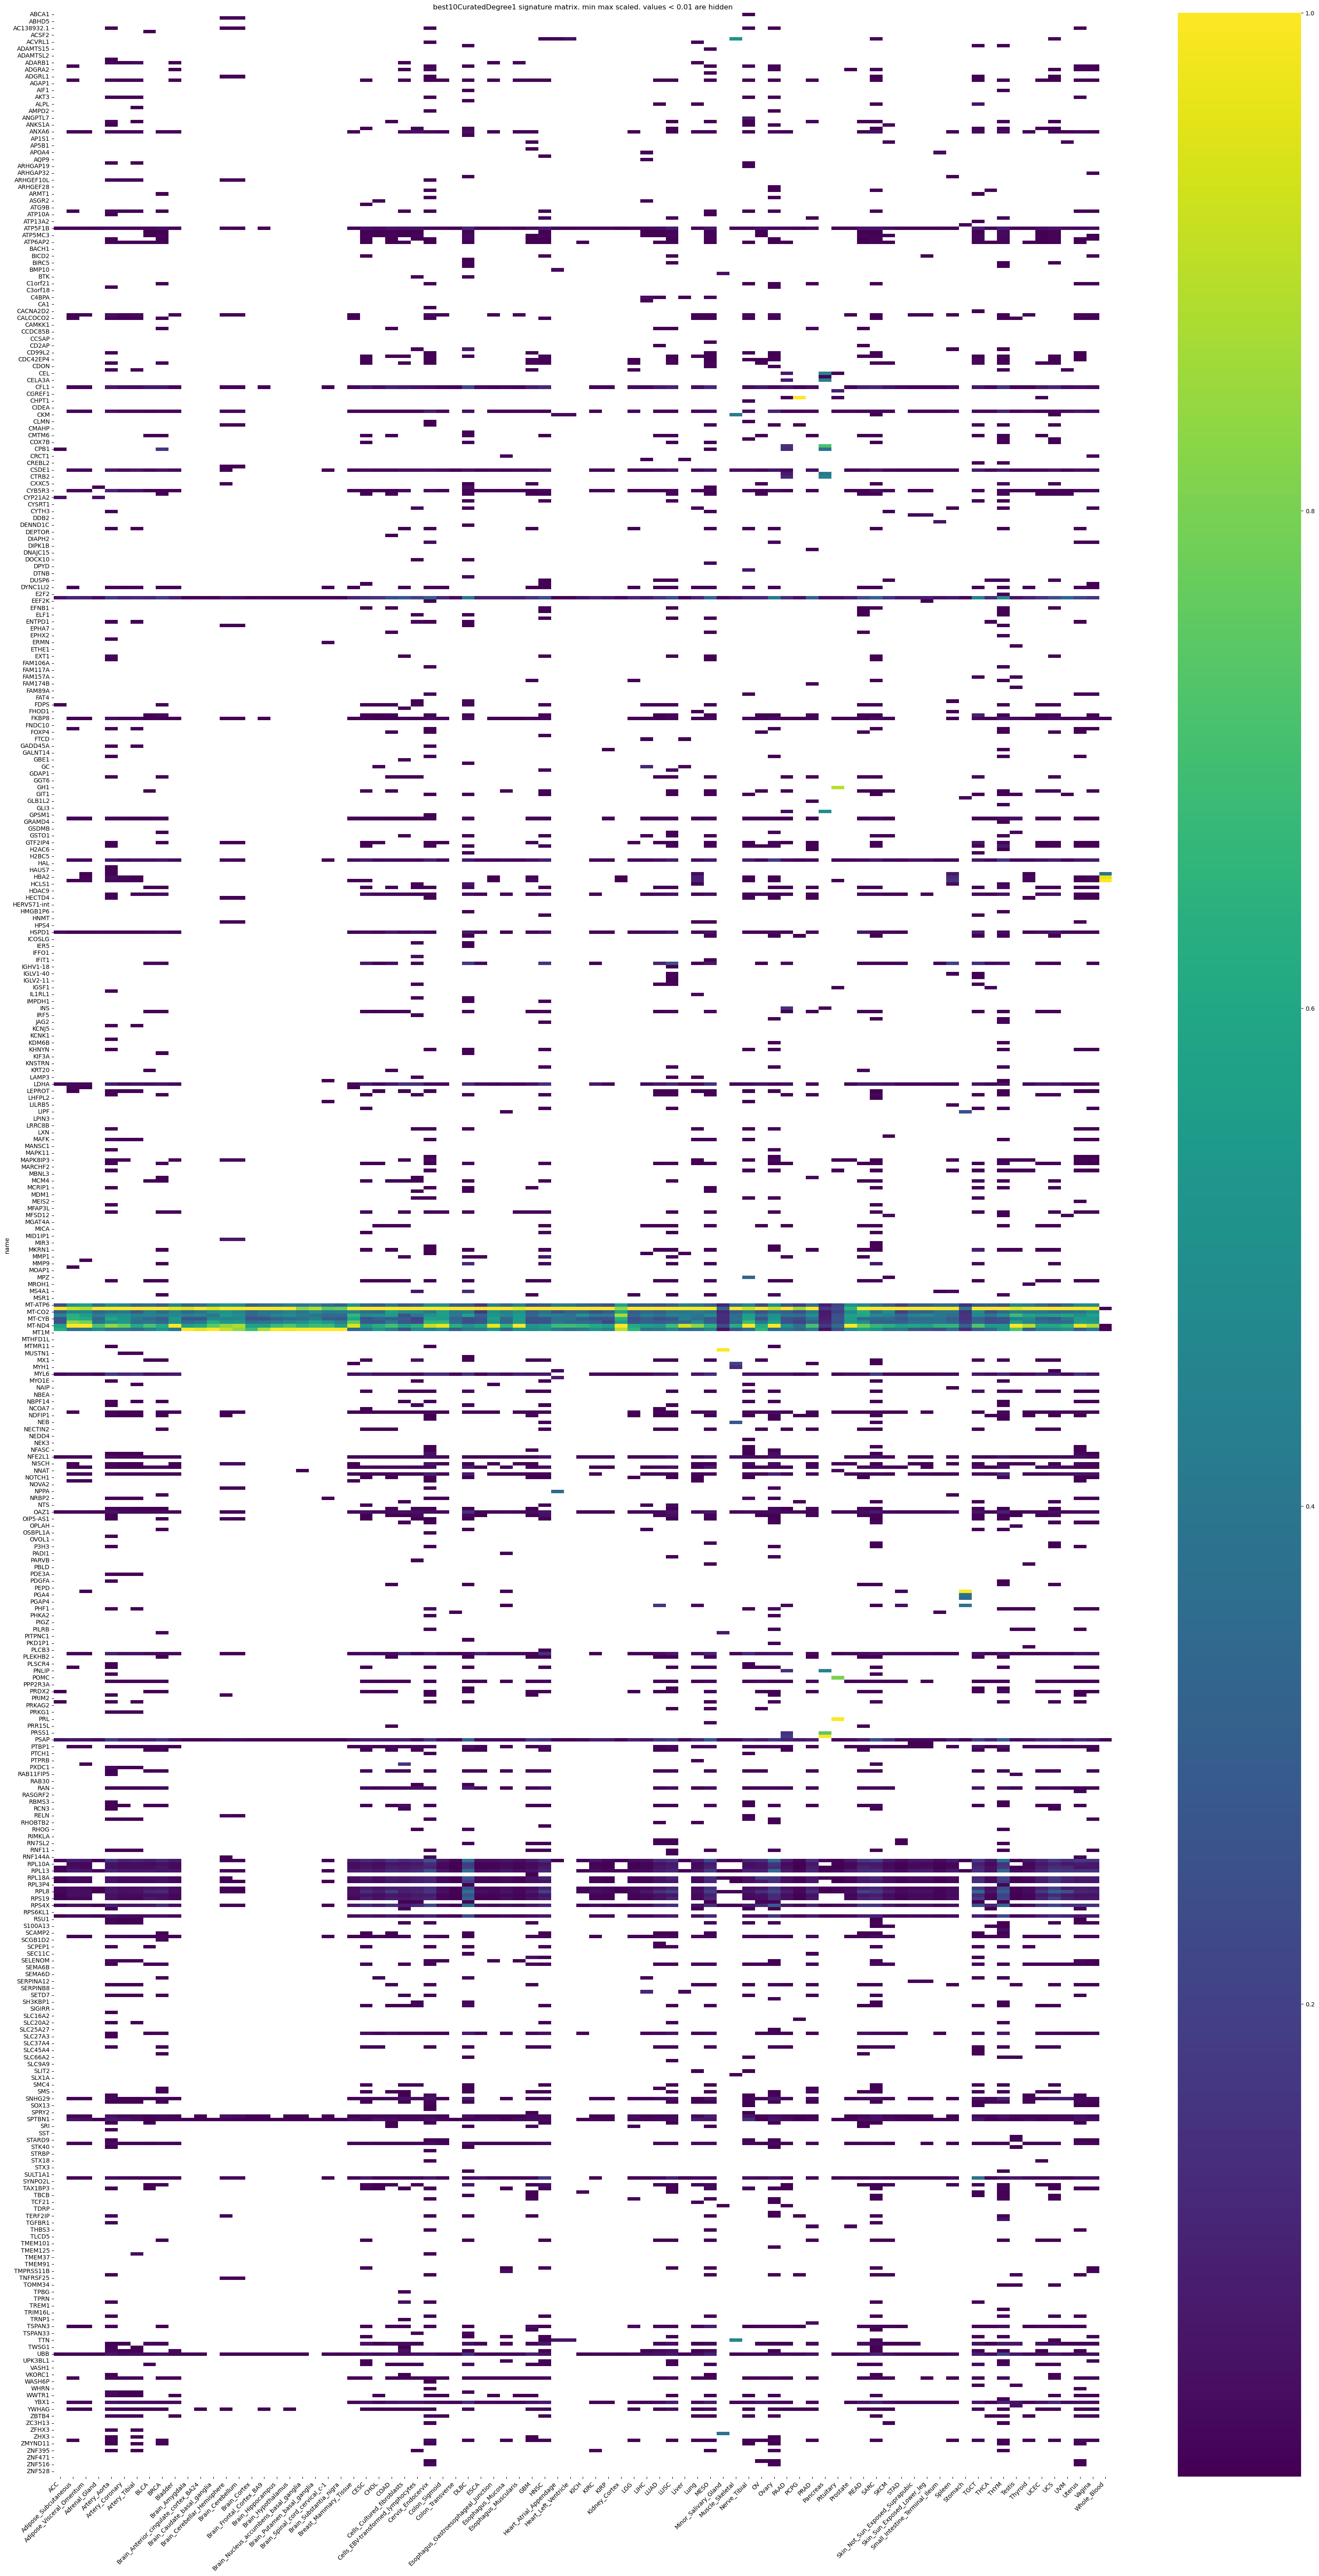

In [11]:
%%time
# find values bellow our threshold
threshold = 0.01 # do not display zeros
hideMaskDF = scaledSignatureGenesDF < threshold
# display(scaledSignatureGenesDF)
print()
# display(maskDF)

# True in the mask means the value should be hidden.
# when you use a mask your color bar will use all the same colors as if
# you did not use a mask how ever the range of values will be truncated
title = f'{runName} signature matrix. min max scaled. values < {threshold} are hidden'
plotHeatMapSeaborn( scaledSignatureGenesDF, title, hideMaskDF=hideMaskDF)

# explore the magic 4

In [12]:
# genesOfInterest = ['MSR1', 'MT-ATP6', 'MT-CO2', 'MT-CYB', 'MT-ND4', 'MT1M']
# genesOfInterest = ['PLEKHM1P1', 'HBB', 'HBA2', 'MT-ATP6', 'MT-CO2', 'MT-CYB', 'MT-ND4', 'CYB5R3']
genesOfInterest = ['PLEKHM1P1', 'HBB', 'HBA2', 'MT-ATP6', 'MT-CO2', 'MT-CYB', 'MT-ND4', 'CYB5R3']
magic4DF = signatureGenesDF.loc[genesOfInterest, :]
print(f'magic4DF.shape : {magic4DF.shape}')
display( magic4DF )

print()
magic4DF.describe()

magic4DF.shape : (8, 83)


,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleus_accumbens_basal_ganglia,Brain_Putamen_basal_ganglia,Brain_Spinal_cord_cervical_c-1,Brain_Substantia_nigra,Breast_Mammary_Tissue,CESC,CHOL,COAD,Cells_Cultured_fibroblasts,Cells_EBV-transformed_lymphocytes,Cervix_Endocervix,Colon_Sigmoid,Colon_Transverse,DLBC,ESCA,Esophagus_Gastroesophageal_Junction,Esophagus_Mucosa,Esophagus_Muscularis,GBM,HNSC,Heart_Atrial_Appendage,Heart_Left_Ventricle,KICH,KIRC,KIRP,Kidney_Cortex,LGG,LIHC,LUAD,LUSC,Liver,Lung,MESO,Minor_Salivary_Gland,Muscle_Skeletal,Nerve_Tibial,OV,Ovary,PAAD,PCPG,PRAD,Pancreas,Pituitary,Prostate,READ,SARC,SKCM,STAD,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,TGCT,THCA,THYM,Testis,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PLEKHM1P1,5.651626e+02,2317.362344,1309.251642,1.197410e+03,1078.978294,1221.519546,1195.144016,1693.808320,1482.366419,1587.267626,197.755583,2.770275e+02,2.815007e+02,1582.551858,1516.149272,4.999417e+02,304.232567,2.162257e+02,5.488580e+02,3.267805e+02,2.337340e+02,360.528281,205.972763,2225.334424,1598.375719,1259.893117,1493.784321,846.955484,806.838680,1540.263257,1224.578995,1.961369e+03,870.837684,5.246690e+03,1392.714560,1849.890604,1221.090095,542.949907,1082.919920,5.853374e+02,3.140694e+02,7.013873e+02,1.137916e+03,1.163291e+03,9.605104e+02,9.350630e+02,293.048421,2117.947102,1643.278672,271.686762,2413.464096,925.336017,2099.134817,349.835477,1884.428384,2.773479e+03,1297.211665,1788.460196,1125.918139,978.103875,451.187535,2307.751969,2054.121070,1295.661343,3.150417e+03,9.615412e+02,3.011295e+03,2338.321412,2821.239094,2096.554532,2119.877846,893.486577,779.447754,2.387787e+03,2045.656672,1371.519119,2586.363189,849.620254,748.760003,482.675689,1617.201890,1955.863998,1.034104e+03
HBB,2.851757e+03,7000.429837,18567.481812,3.498520e+03,9138.510390,10604.078074,6017.916633,1259.762900,946.399877,2548.528673,6416.560988,5.148838e+03,6.595457e+03,4341.982593,3054.822114,4.451971e+03,4703.454059,5.417544e+03,6.475798e+03,5.165223e+03,6.366874e+03,6460.729994,7302.178264,7743.657491,19352.983320,419.516070,1218.705979,738.724132,2208.609902,1796.476653,2972.763362,4.440852e+03,1196.348231,2.547764e+03,8931.112109,4610.531816,6965.314607,28375.513640,1146.482974,1.124707e+04,7.395742e+03,4.007120e+03,1.312657e+04,3.923886e+03,2.067208e+04,1.592999e+04,696.481132,4715.382055,2251.469197,8271.879644,46252.022098,2259.027396,2024.151382,2502.761460,5769.193767,3.690153e+03,3712.953131,2800.383415,11124.790088,609.584593,853.799725,13602.417655,5115.850011,1023.357558,4.886041e+03,5.264183e+02,4.771432e+03,1701.469891,1906.422164,4551.034453,105633.604631,2615.328184,624.514106,4.912351e+03,1572.966049,5665.056737,17201.424233,1516.135758,1078.908619,2406.892731,4275.507302,8555.178093,2.563541e+06
HBA2,3.019908e+03,6537.796629,16958.981152,3.395462e+03,9241.213319,10990.930011,5682.614198,1409.132663,750.477450,2875.062056,5227.232649,4.678461e+03,5.676117e+03,3923.611798,3248.757826,4.509666e+03,3681.319649,4.664865e+03,5.458311e+03,4.590867e+03,5.238997e+03,5171.887058,6728.430471,6841.978996,6990.038496,566.520690,1390.230935,675.579063,2242.694574,1794.036966,3004.650941,3.814968e+03,1302.145293,5.796487e+03,8617.597038,4697.905417,6934.663940,17527.814443,1115.350685,1.133841e+04,6.830569e+03,4.511087e+03,9.289892e+03,4.154648e+03,2.061384e+04,1.427460e+04,910.351641,3152.078185,1569.126427,7522.068137,44585.344135,2146.202367,2031.562875,2483.690888,5099.848604,6.392055e+03,3471.629471,1712.338214,8149.920833,680.855273,797.191820,12881.580547,4627.575175,891.9

,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleus_accumbens_basal_ganglia,Brain_Putamen_basal_ganglia,Brain_Spinal_cord_cervical_c-1,Brain_Substantia_nigra,Breast_Mammary_Tissue,CESC,CHOL,COAD,Cells_Cultured_fibroblasts,Cells_EBV-transformed_lymphocytes,Cervix_Endocervix,Colon_Sigmoid,Colon_Transverse,DLBC,ESCA,Esophagus_Gastroesophageal_Junction,Esophagus_Mucosa,Esophagus_Muscularis,GBM,HNSC,Heart_Atrial_Appendage,Heart_Left_Ventricle,KICH,KIRC,KIRP,Kidney_Cortex,LGG,LIHC,LUAD,LUSC,Liver,Lung,MESO,Minor_Salivary_Gland,Muscle_Skeletal,Nerve_Tibial,OV,Ovary,PAAD,PCPG,PRAD,Pancreas,Pituitary,Prostate,READ,SARC,SKCM,STAD,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,TGCT,THCA,THYM,Testis,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood
count,8.000000e+00,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000e+00,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00
mean,4.818638e+05,225892.413853,230488.772044,3.753827e+05,77626.312662,126376.411003,91318.368878,293262.354733,282837.598629,198856.955154,327595.626710,3.972389e+05,4.902727e+05,286390.222200,248111.463382,3.775714e+05,324785.564706,3.784583e+05,4.408799e+05,4.258166e+05,4.351267e+05,228876.561805,314567.273071,221083.438782,224159.679452,217786.220692,253620.287269,112218.112079,177232.488504,87969.210443,225262.675383,4.321000e+05,87913.893390,6.759199e+05,267274.287067,126344.806867,252531.899438,144237.181779,149438.102259,3.996638e+05,4.543359e+05,1.231535e+06,5.175008e+05,5.248215e+05,5.657917e+05,4.223134e+05,201570.485865,202225.412317,186015.849703,283526.239852,132424.604854,139289.726616,171595.520845,237941.000107,132424.224878,5.087782e+05,87700.562544,197066.939457,341484.883955,320726.666301,71712.900215,175593.771407,246680.741856,263961.772194,5.352314e+05,3.560863e+05,7.605417e+05,169113.149995,158178.300709,270180.320434,161161.425927,219365.977773,156759.194215,4.606836e+05,118626.894273,224818.197622,176422.677666,219767.371459,147126.801226,300904.806260,111620.742537,107625.547797,6.419631e+05
std,5.814722e+05,255211.428884,255461.608495,4.468694e+05,77716.393080,131632.032577,95634.485657,337980.102492,325896.322594,234837.537520,376823.333713,4.577997e+05,5.433986e+05,322439.587683,285856.674655,4.395044e+05,370528.810947,4.380811e+05,5.053662e+05,4.764986e+05,4.790780e+05,266551.135110,354872.885629,248457.696530,244398.541439,252394.678605,290412.704983,125771.857169,214238.981122,98915.167578,255666.575752,4.969067e+05,97710.013060,9.067915e+05,308436.905109,141280.506166,293716.132821,153790.485378,168119.622009,4.696304e+05,5.285989e+05,1.483302e+06,6.246056e+05,6.310926e+05,6.268896e+05,5.010287e+05,229444.909363,232605.051484,219580.582447,344887.202285,133611.164998,160667.048236,199143.506391,273532.871780,153886.659774,6.399887e+05,103190.597552,222775.676852,380182.830097,365326.827202,83297.706217,187870.175251,285184.424110,299539.537954,5.928918e+05,4.034899e+05,9.776267e+05,193369.01

saved image to /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out/img/best10CuratedDegree1-magic-4-signature-matrix.png
saved image to /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out/img/best10CuratedDegree1-magic-4-signature-matrix-colormap-test.png


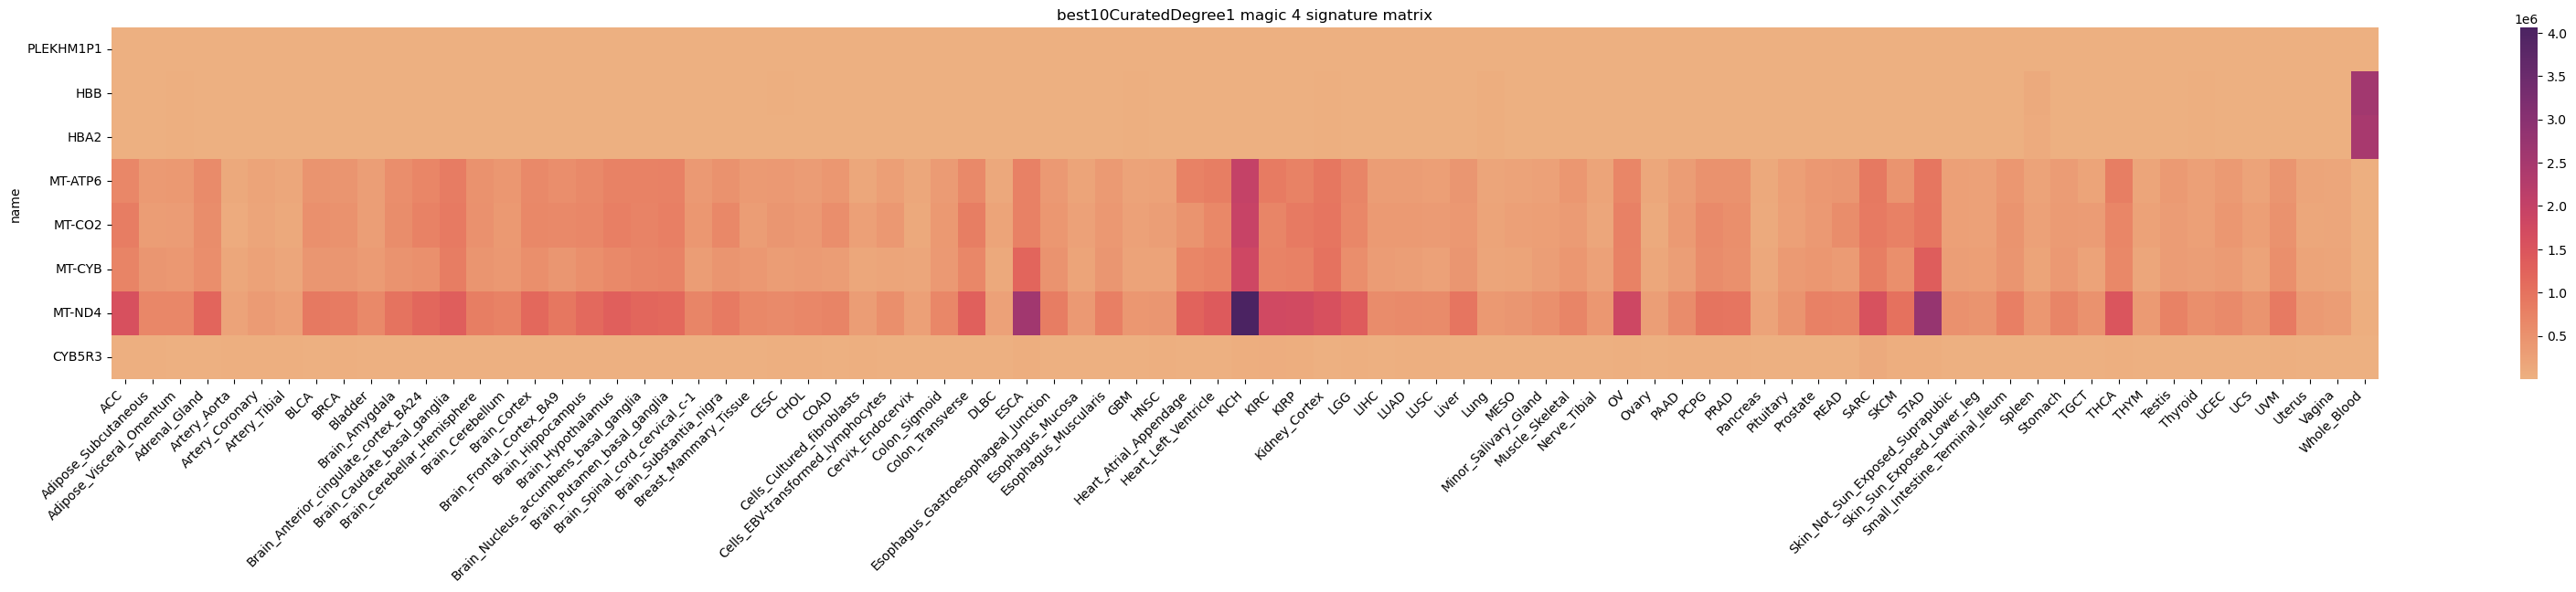

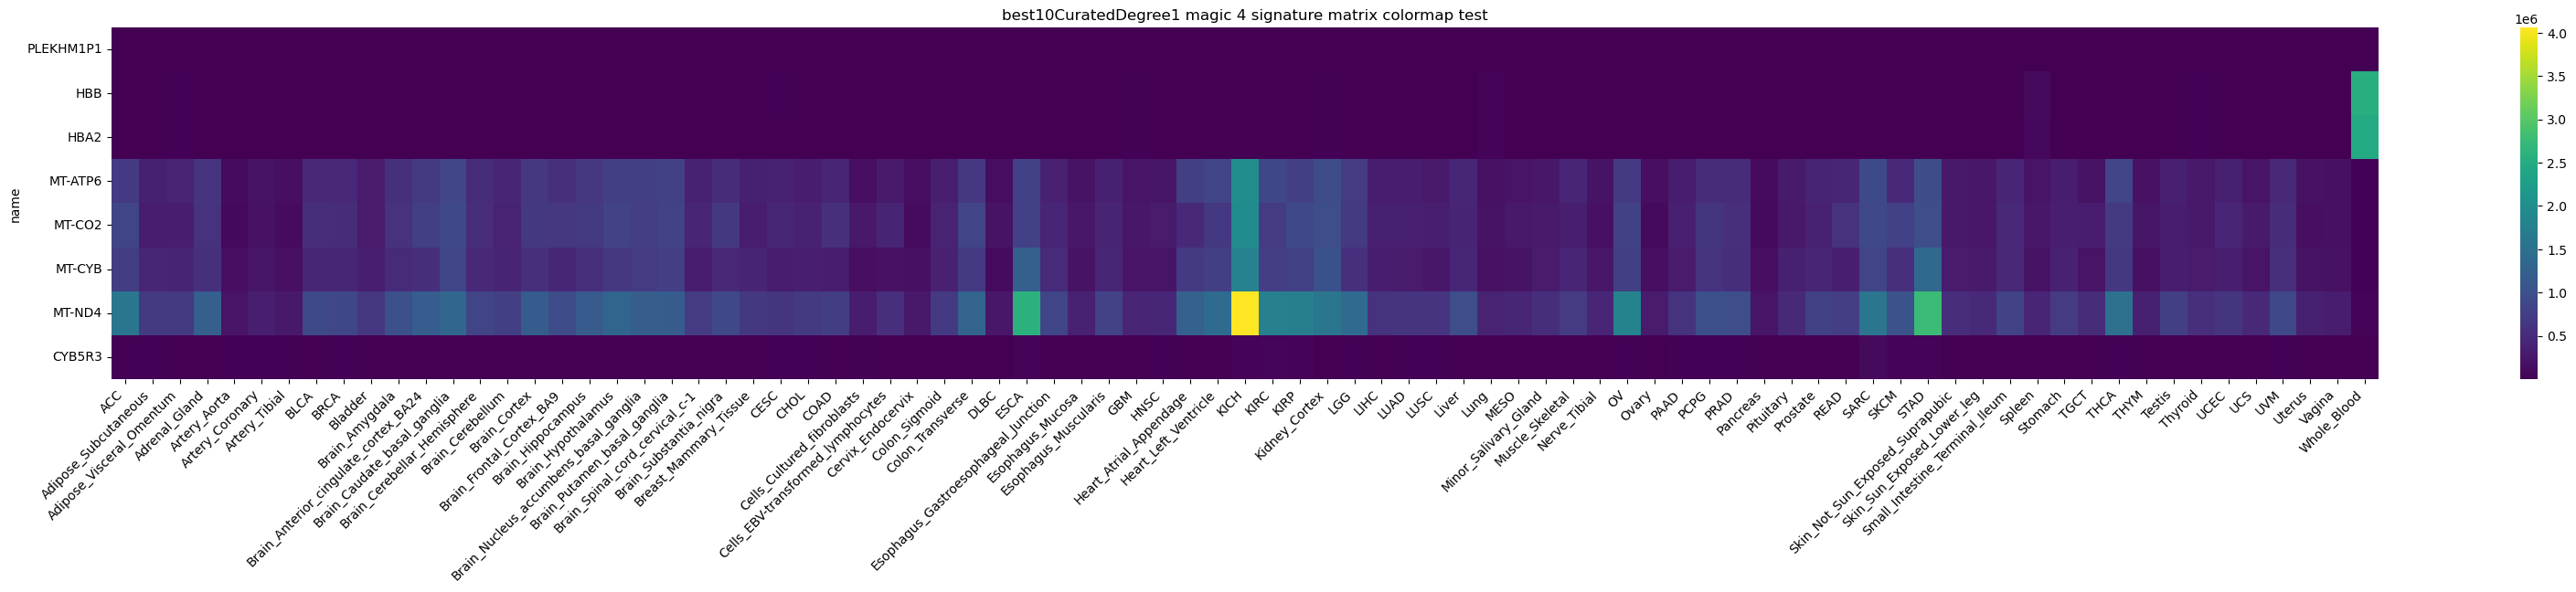

In [13]:
title = f'{runName} magic 4 signature matrix'
# use a different color map. the scale is different if we use the default colorMap it is easy to get confused. 
# the color value can be very different from other plots
plotHeatMapSeaborn( magic4DF, title, height=5, hideMaskDF=None, colorMapName="flare")

plotHeatMapSeaborn( magic4DF, title + " colormap test", height=5, hideMaskDF=None)

## explore scaled

In [14]:
scaledMagic4DF = scaledSignatureGenesDF.loc[genesOfInterest, :]
print(f'scaledMagic4DF.shape : {scaledMagic4DF.shape}')
display( scaledMagic4DF )

print()
scaledMagic4DF.describe()

scaledMagic4DF.shape : (8, 83)


,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleus_accumbens_basal_ganglia,Brain_Putamen_basal_ganglia,Brain_Spinal_cord_cervical_c-1,Brain_Substantia_nigra,Breast_Mammary_Tissue,CESC,CHOL,COAD,Cells_Cultured_fibroblasts,Cells_EBV-transformed_lymphocytes,Cervix_Endocervix,Colon_Sigmoid,Colon_Transverse,DLBC,ESCA,Esophagus_Gastroesophageal_Junction,Esophagus_Mucosa,Esophagus_Muscularis,GBM,HNSC,Heart_Atrial_Appendage,Heart_Left_Ventricle,KICH,KIRC,KIRP,Kidney_Cortex,LGG,LIHC,LUAD,LUSC,Liver,Lung,MESO,Minor_Salivary_Gland,Muscle_Skeletal,Nerve_Tibial,OV,Ovary,PAAD,PCPG,PRAD,Pancreas,Pituitary,Prostate,READ,SARC,SKCM,STAD,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,TGCT,THCA,THYM,Testis,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PLEKHM1P1,0.000202,0.003427,0.001921,0.000700,0.004345,0.002738,0.002811,0.001358,0.001045,0.002473,0.000114,0.000144,0.000156,0.001602,0.001769,0.000250,0.000187,0.000127,0.000305,0.000176,0.000139,0.000348,0.000131,0.003213,0.001389,0.001170,0.001474,0.001575,0.000935,0.005377,0.001776,0.000956,0.001894,0.001190,0.001632,0.003323,0.001536,0.000666,0.001369,0.000322,0.000156,0.000115,0.000400,0.000388,0.000603,0.000411,0.000276,0.001808,0.001884,0.000264,0.005061,0.001380,0.000905,0.000306,0.004451,0.000947,0.004519,0.001552,0.000437,0.000721,0.000337,0.001743,0.002681,0.001363,0.001324,0.000602,0.000621,0.002711,0.003481,0.001725,0.003284,0.000390,0.001143,0.000887,0.003165,0.001806,0.004185,0.000814,0.000979,0.000356,0.004463,0.005540,0.000403
HBB,0.001019,0.010360,0.027270,0.002047,0.036818,0.023783,0.014160,0.001010,0.000667,0.003971,0.003705,0.002673,0.003670,0.004397,0.003565,0.002226,0.002892,0.003187,0.003598,0.002786,0.003787,0.006247,0.004644,0.011189,0.016816,0.000390,0.001202,0.001374,0.002563,0.006272,0.004313,0.002165,0.002602,0.000578,0.010466,0.008283,0.008765,0.034785,0.001450,0.006193,0.003669,0.000659,0.004615,0.001310,0.013002,0.006998,0.000656,0.004026,0.002581,0.008048,0.097056,0.003370,0.000872,0.002189,0.013628,0.001260,0.012937,0.002430,0.004319,0.000449,0.000638,0.010286,0.006681,0.001076,0.002053,0.000329,0.000983,0.001972,0.002351,0.003747,0.163762,0.001144,0.000915,0.001825,0.002433,0.007469,0.027845,0.001453,0.001411,0.001775,0.011801,0.024248,1.000000
HBA2,0.001079,0.009675,0.024908,0.001987,0.037232,0.024651,0.013371,0.001130,0.000529,0.004479,0.003019,0.002429,0.003158,0.003974,0.003792,0.002254,0.002263,0.002744,0.003033,0.002476,0.003116,0.005001,0.004279,0.009886,0.006074,0.000526,0.001372,0.001257,0.002603,0.006263,0.004359,0.001859,0.002832,0.001315,0.010099,0.008440,0.008727,0.021487,0.001410,0.006243,0.003388,0.000742,0.003266,0.001387,0.012965,0.006271,0.000857,0.002692,0.001799,0.007318,0.093559,0.003202,0.000876,0.002172,0.012047,0.002182,0.012096,0.001486,0.003164,0.000502,0.000596,0.009740,0.006043,0.000938,0.002295,0.000484,0.002060,0.002872,0.003080,0.003081,0.129858,0.001071,0.002072,0.001733,0.002818,0.008802,0.026354,0.001366,0.001470,0.002912,0.012026,0.023706,0.961589
MT-ATP6,0.241838,0.520672,0.561533,0.361909,0.494950,0.459841,0.346946,0.372274,0.313489,0.466506,0.322439,0.361203,0.473608,0.509524,0.492491,0.320490,0.351013,0.375653,0.420089,0.404616,0.453333,0.360070,0.321189,0.517356,0.327281,0.295076,0.407393,0.279591,0.317400,0.502173,0.504667,0.314838,0.301170,0.173909,0.438912,0.342677,0.445605,0.262288,0.284142,0.417604,0.401507,0.328614,0.305121,0.250757,0.580117,0.307991,0.292933,0.265317,0.314172,0.427211,0.395729,0.311716,0.108914,0.364823,0.464054,0.233256,0.505853,0.271682,0.192255,0.368592,0.087640,0.212

,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleus_accumbens_basal_ganglia,Brain_Putamen_basal_ganglia,Brain_Spinal_cord_cervical_c-1,Brain_Substantia_nigra,Breast_Mammary_Tissue,CESC,CHOL,COAD,Cells_Cultured_fibroblasts,Cells_EBV-transformed_lymphocytes,Cervix_Endocervix,Colon_Sigmoid,Colon_Transverse,DLBC,ESCA,Esophagus_Gastroesophageal_Junction,Esophagus_Mucosa,Esophagus_Muscularis,GBM,HNSC,Heart_Atrial_Appendage,Heart_Left_Ventricle,KICH,KIRC,KIRP,Kidney_Cortex,LGG,LIHC,LUAD,LUSC,Liver,Lung,MESO,Minor_Salivary_Gland,Muscle_Skeletal,Nerve_Tibial,OV,Ovary,PAAD,PCPG,PRAD,Pancreas,Pituitary,Prostate,READ,SARC,SKCM,STAD,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,TGCT,THCA,THYM,Testis,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.172138,0.334430,0.338550,0.219761,0.312765,0.283462,0.214892,0.235131,0.199392,0.309837,0.189190,0.206274,0.272794,0.290084,0.289674,0.188771,0.199715,0.222651,0.244988,0.229671,0.258845,0.221321,0.200056,0.319559,0.194775,0.202311,0.250226,0.208836,0.205838,0.307148,0.326898,0.210719,0.191231,0.153348,0.313226,0.227028,0.317820,0.176820,0.188962,0.220072,0.225397,0.202517,0.181924,0.175270,0.355879,0.185530,0.189765,0.172684,0.213222,0.275879,0.277889,0.207789,0.074017,0.208162,0.312851,0.173672,0.305622,0.171000,0.132578,0.236453,0.053674,0.132805,0.322304,0.277663,0.224991,0.222803,0.156733,0.196293,0.195370,0.222560,0.249847,0.095946,0.229873,0.171193,0.183529,0.296536,0.285597,0.210653,0.192554,0.221851,0.308128,0.305105,0.250420
std,0.207721,0.377841,0.375234,0.261613,0.313130,0.295252,0.225050,0.270985,0.229747,0.365898,0.217620,0.237721,0.302355,0.326599,0.333744,0.219736,0.227844,0.257728,0.280822,0.257008,0.284991,0.257752,0.225689,0.359130,0.212361,0.234460,0.286526,0.234060,0.248820,0.345367,0.371021,0.242324,0.212540,0.205726,0.361466,0.253867,0.369653,0.188531,0.212585,0.258599,0.262239,0.243918,0.219576,0.210760,0.394310,0.220112,0.216006,0.198625,0.251696,0.335586,0.280382,0.239679,0.085900,0.239299,0.363557,0.218461,0.359605,0.193308,0.147603,0.269334,0.062346,0.142092,0.372615,0.315088,0.249231,0.252463,0.201470,0.224451,0.220655,0.252193,0.219553,0.113703,0.272270,0.203566,0.205670,0.357658,0.322770,0.236274,0.223657,0.249343,0.354783,0.328682,0.450939
min,0.000202,0.003427,0.001921,0.000700,0.004345,0.002738,0.002811,0.001010,0.000529,0.002473,0.000114,0.000144,0.000156,0.001602,0.001769,0.000250,0.000187,0.000127,0.000305,0.000176,0.000139,0.000348,0.000131,0.003213,0.001389,0.000390,0.001202,0.001257,0.000935,0.005377,0.001776,0.000956,0.001894,0.000578,0.001632,0.003323,0.001536,0.000666,0.001369,0.000322,0.000156,0.000115,0.000400,0.000388,0.000603,0.000411,0.000276,0.001808,0.001799,0.000264,0.005061,0.001380,0.000872,0.000306,0.004451,0.000947,0.004519,0.001486,0.000437,0.000449,0.000337,0.001743,0.002681,0.000938,0.001324,0.000329,0.000621,0.001972,0.002351,0.001725,0.003284,0.000390,0.

saved image to /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out/img/best10CuratedDegree1-scaled-magic-4-signature-matrix.png
saved image to /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out/img/best10CuratedDegree1-scaled-magic-4-signature-matrix-color-map-test.png


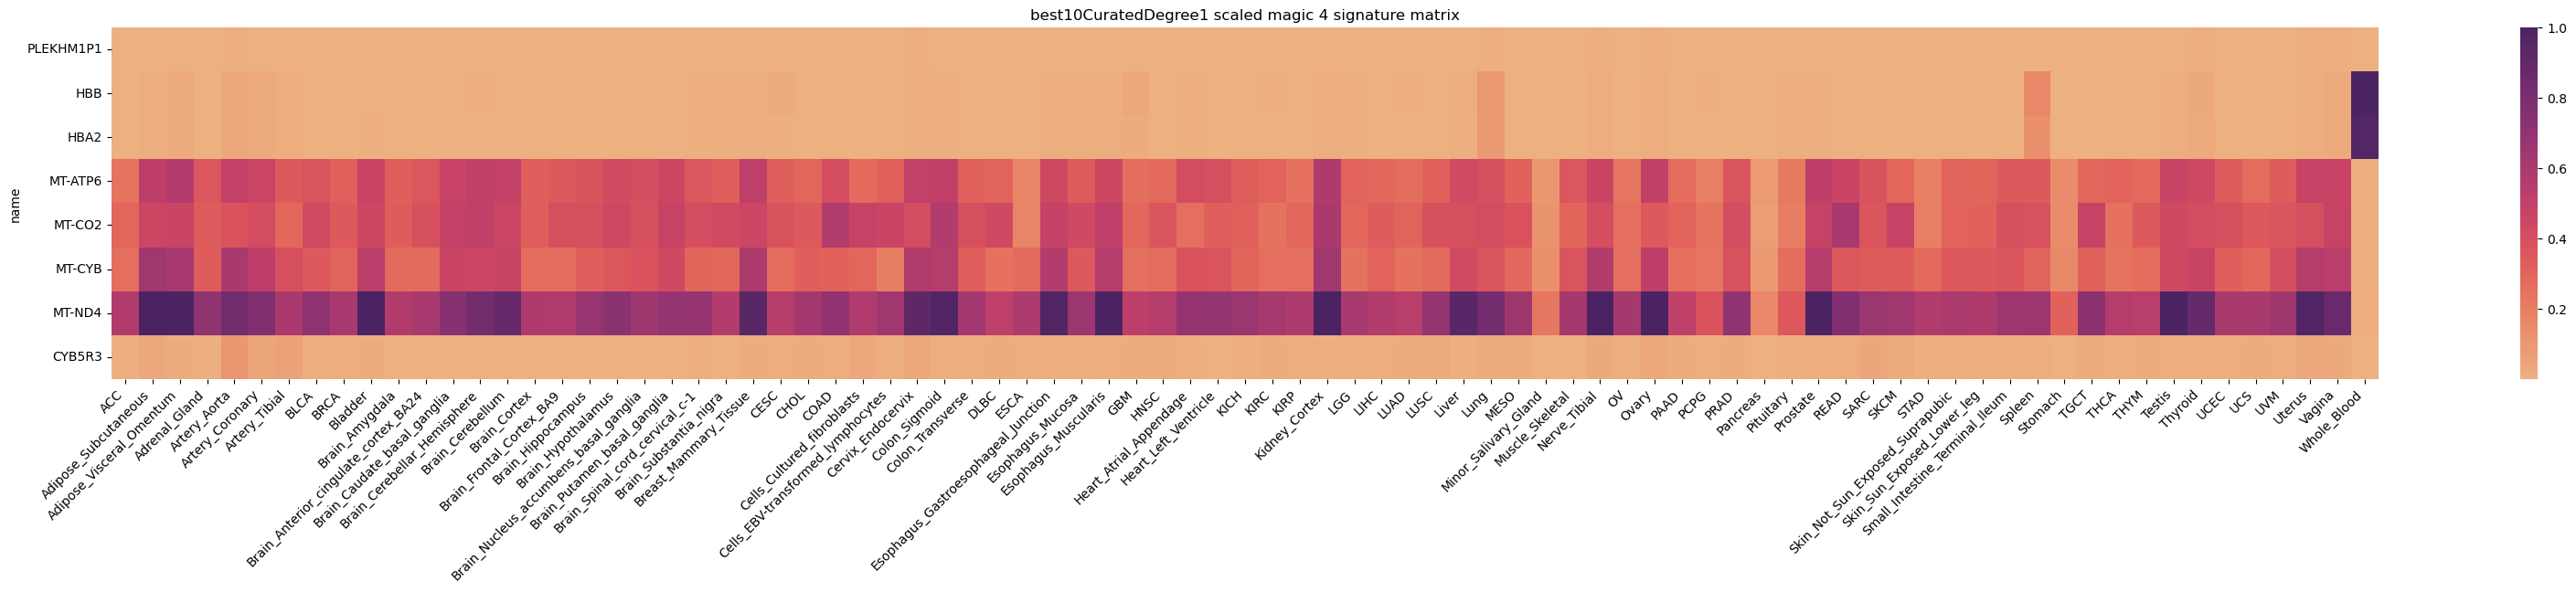

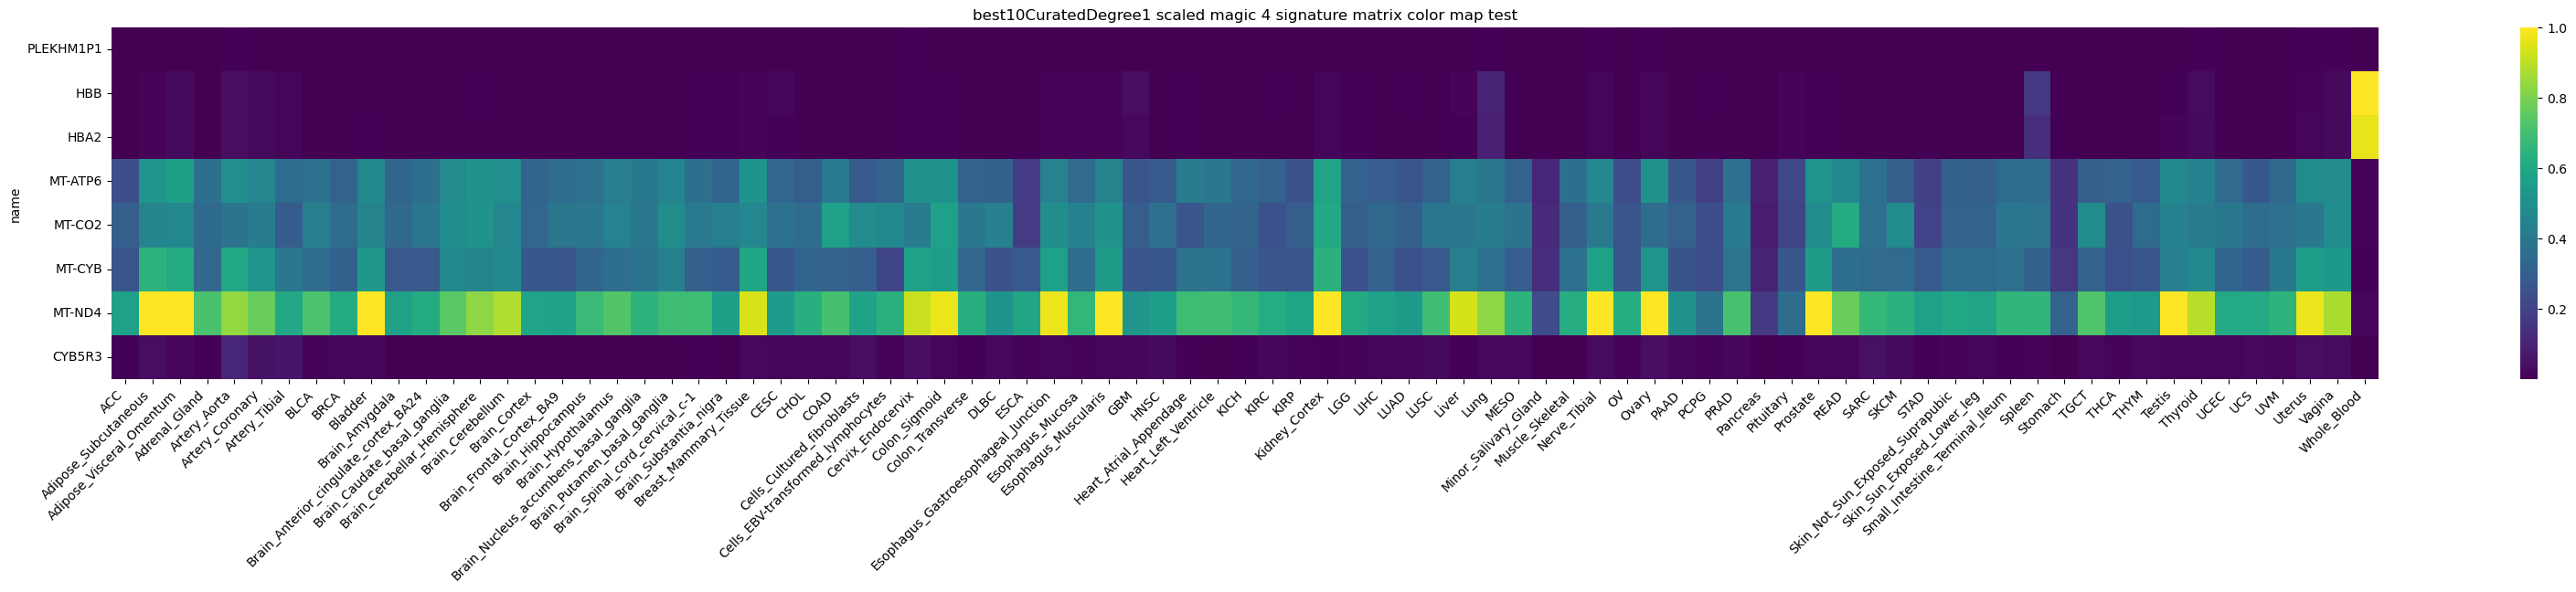

In [15]:
title = f'{runName} scaled magic 4 signature matrix'

# use a different color map. the scale is different if we use the default colorMap it is easy to get confused. 
# the color value can be very different from other plots
plotHeatMapSeaborn( scaledMagic4DF, title, height=5, hideMaskDF=None, colorMapName="flare")

plotHeatMapSeaborn( scaledMagic4DF, title + " color map test", height=5, hideMaskDF=None)

# explore ordered signature matrix

saved image to /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out/img/best10CuratedDegree1-scaled-ordered-signature-matrix-min-max-scaled-values-001.png
CPU times: user 16 s, sys: 1.58 s, total: 17.6 s
Wall time: 17.5 s


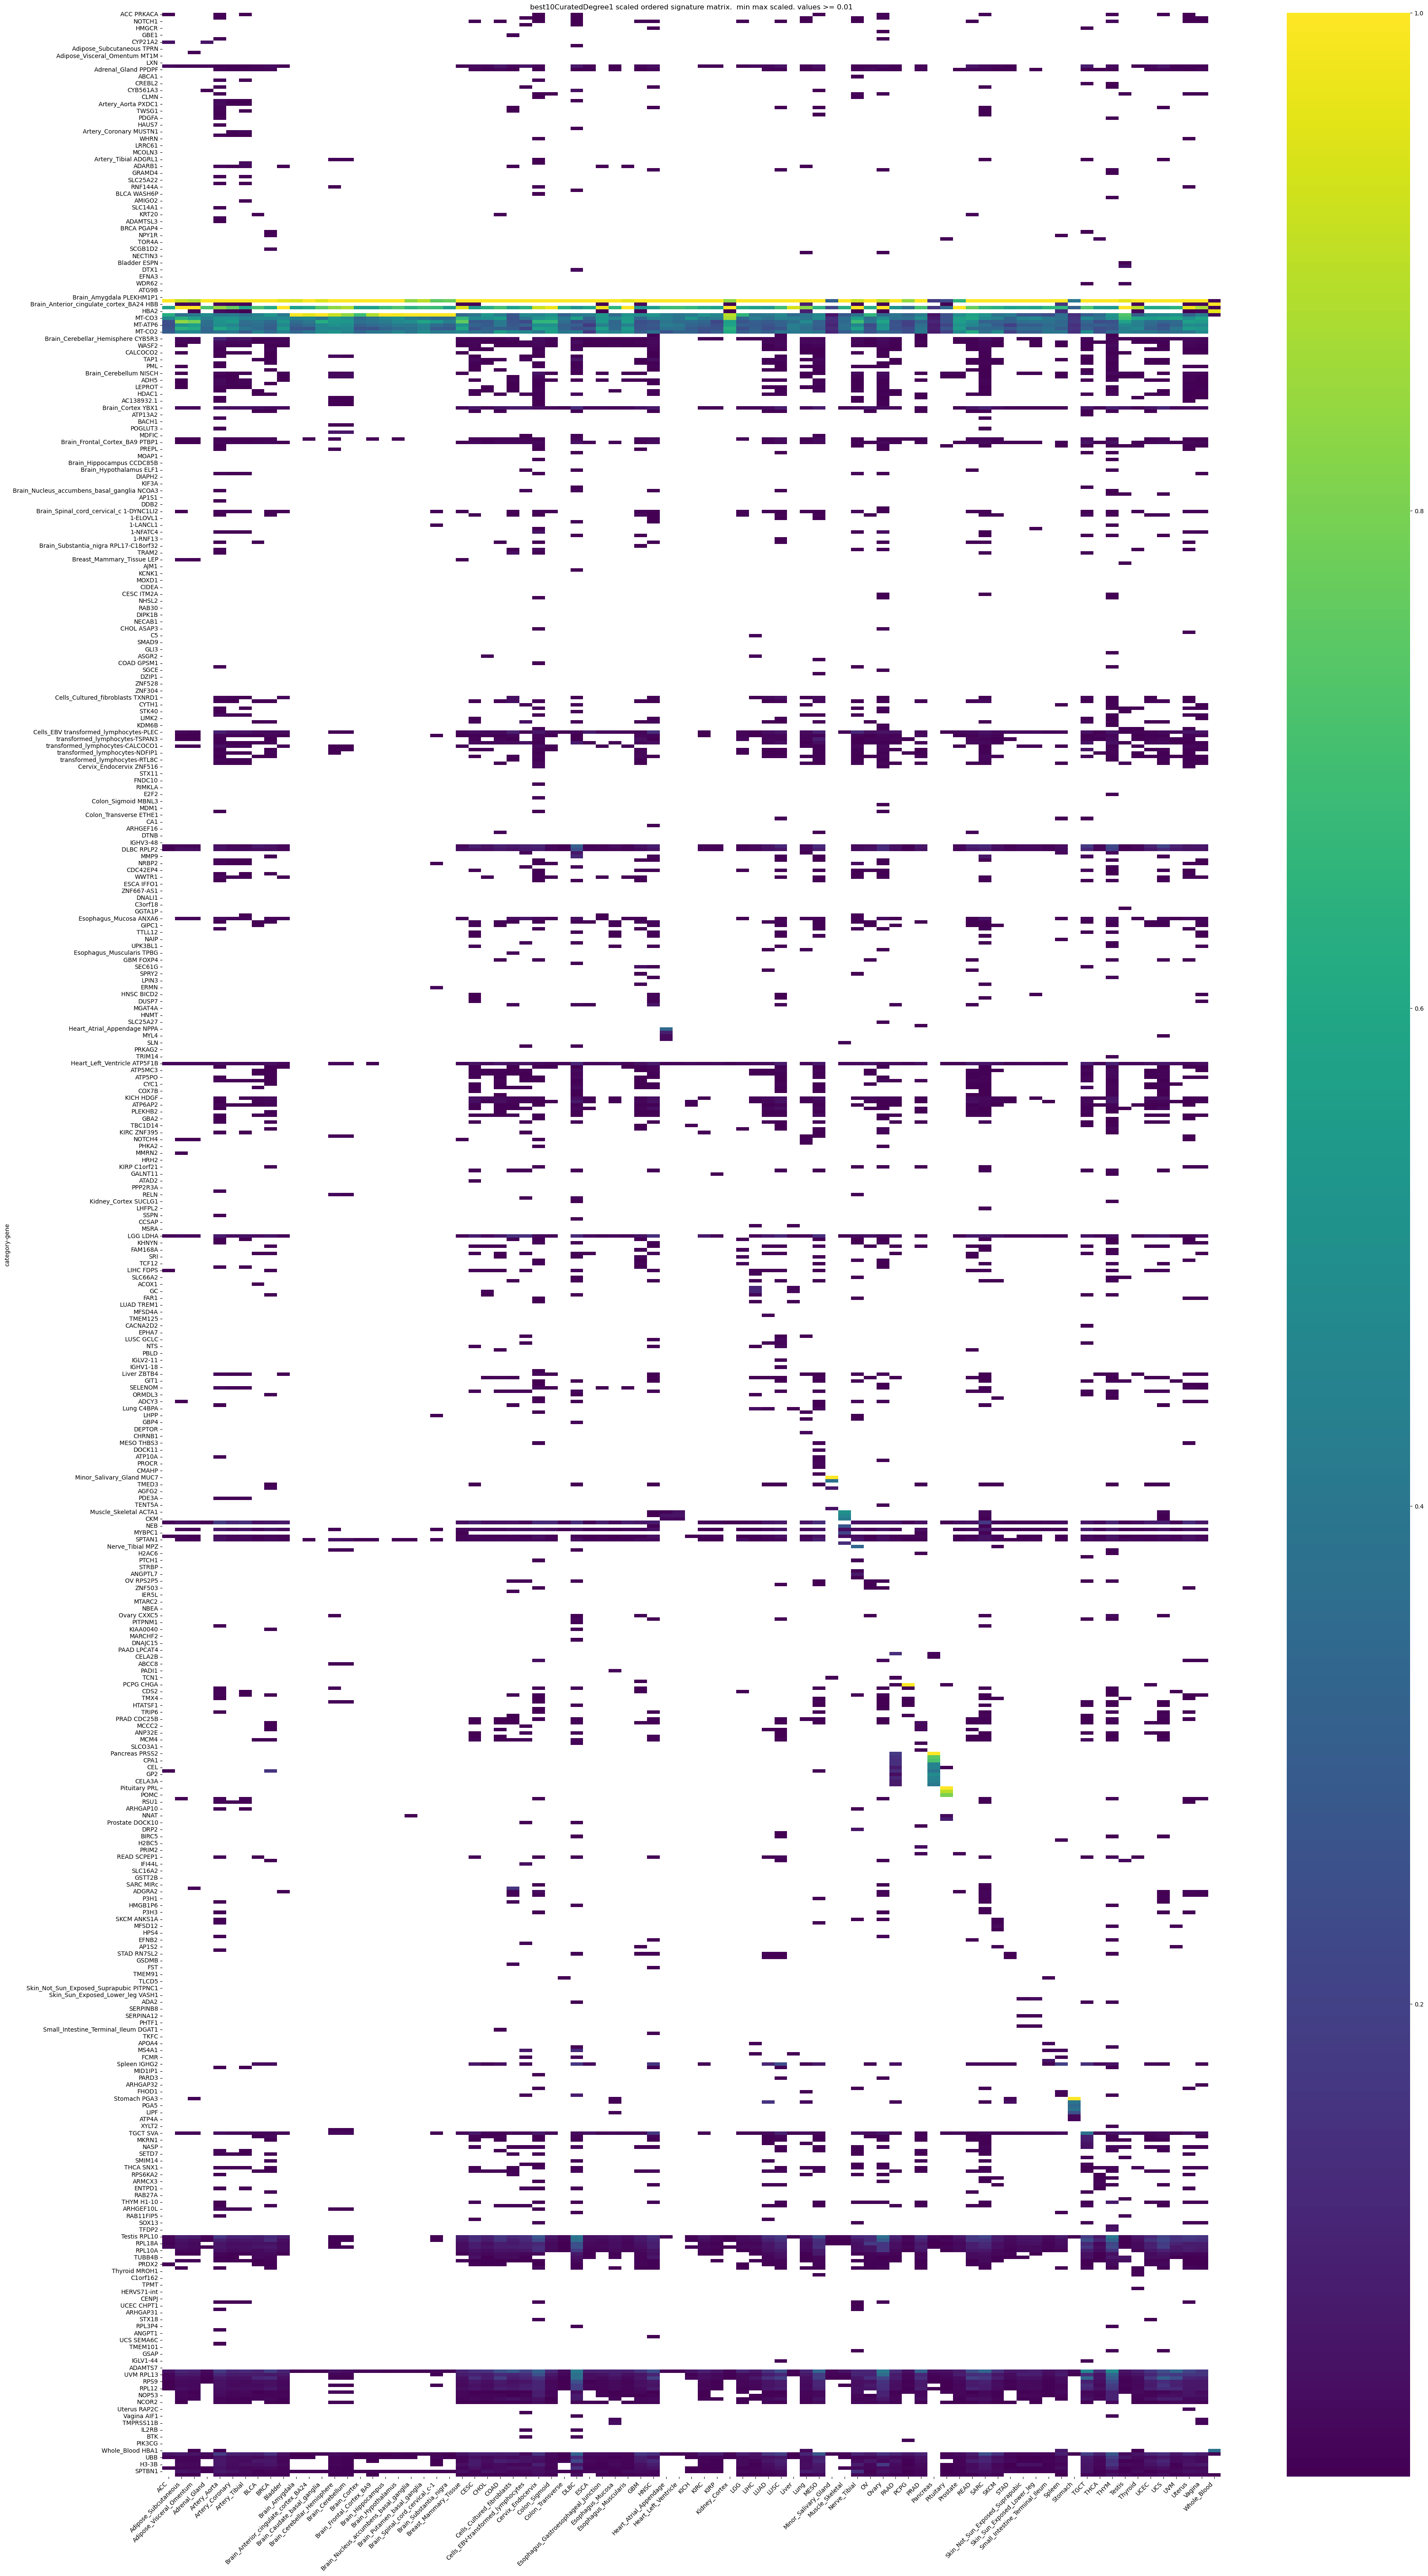

In [16]:
%%time
# title = f'{runName} ordered signature matrix'
# plotHeatMapSeaborn( orderedSignatureGenesDF, title,  hideMaskDF=None)

# title = f'{runName} scaled ordered signature matrix'
# plotHeatMapSeaborn( scaledOrderedSignatureGenesDF, title,  hideMaskDF=None)

# find values bellow our threshold
threshold = 0.01 # do not display zeros
hideMaskDF = scaledOrderedSignatureGenesDF < threshold
title = f'{runName} scaled ordered signature matrix.  min max scaled. values >= {threshold}'
width =  50 # default = 40
height =  100 #85 # default 75
# plotHeatMapSeaborn( scaledOrderedSignatureGenesDF, title, width=width, height=height, hideMaskDF=hideMaskDF)
plotHeatMapSeaborn( scaledOrderedSignatureGenesDF, title, hideMaskDF=hideMaskDF)

# BONE YARD

[[0.11911252 0.54809098 0.64843009]
 [0.55732309 0.21838891 0.34570047]
 [0.73927197 0.09746891 0.47159056]
 [0.55086737 0.24248284 0.13359411]
 [0.18746043 0.27719393 0.40842097]]

first col
[0.         0.70660951 1.         0.69619973 0.11021022]


mask
[[ True False False]
 [False  True  True]
 [False  True False]
 [False  True  True]
 [ True  True False]]

~mask
[[False  True  True]
 [ True False False]
 [ True False  True]
 [ True False False]
 [False False  True]]


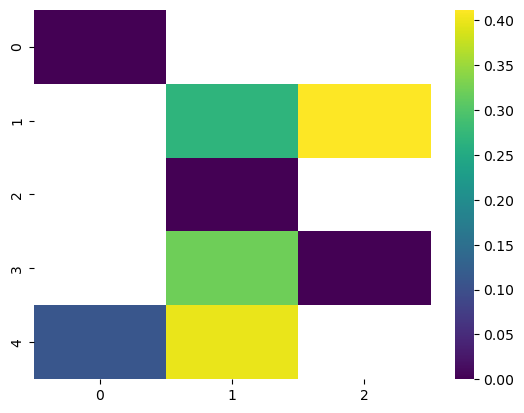

In [17]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# Sample data
# data = np.random.rand(10, 10)
data = np.random.rand(5, 3)
print(data)
print()

# Scale data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

print('first col')
print( data_scaled[:, 0] ) 
print()

# Create a mask for values below the threshold
threshold = 0.5
mask = data_scaled <= threshold
print("\nmask")
print(mask)

print()
print(f"~mask\n{~mask}")

# Plot heatmap with the mask
sns.heatmap(data_scaled, mask=~mask, cmap='viridis', cbar=True)

plt.show()

[[0.28230537 0.20839583 0.47569069]
 [0.1099252  0.9494905  0.48601428]
 [0.34166458 0.8934698  0.47375811]
 [0.16080899 0.09378658 0.6524823 ]
 [0.77243452 0.68932171 0.17483575]]

first col
[0.26019282 0.         0.34979037 0.07680465 1.        ]


mask
[[False False  True]
 [False  True  True]
 [False  True  True]
 [False False  True]
 [ True  True False]]

~mask
[[ True  True False]
 [ True False False]
 [ True False False]
 [ True  True False]
 [False False  True]]


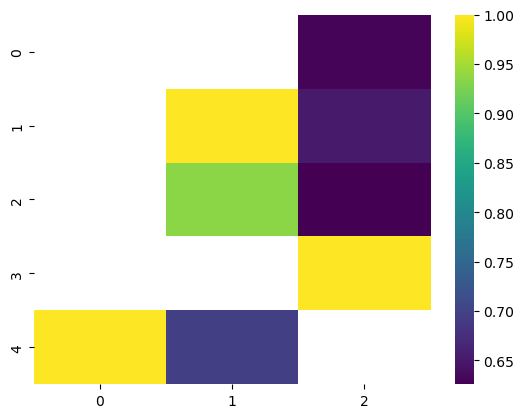

In [18]:
# Sample data
# data = np.random.rand(10, 10)
data = np.random.rand(5, 3)
print(data)
print()

# Scale data using MinMaxScaler
scalerX = MinMaxScaler()
scalerX.fit(data)
data_scaled = scalerX.transform(data)

print('first col')
print( data_scaled[:, 0] ) 
print()

# Create a mask for values below the threshold
threshold = 0.5
mask = data_scaled > threshold
print("\nmask")
print(mask)

print()
print(f"~mask\n{~mask}")


# Plot heatmap with the mask
sns.heatmap(data_scaled, mask=~mask, cmap='viridis', cbar=True)

plt.show()

In [19]:

# # Create a color palette
# palette = sns.color_palette("viridis", 10)

# # Print the number of colors in the palette
# print(f"Number of colors in the palette: {len(palette)}")

# # Optionally, print the colors in the palette
# print("Colors in the palette:", palette)


In [20]:
# # https://matplotlib.org/2.0.2/users/annotations.html

# # Sample data
# data = np.random.rand(20, 10)
# df = pd.DataFrame(data)

# display(df)

# # Create the heatmap
# ax = sns.heatmap(df, cmap='viridis')

# # Add brackets and labels for groups
# group_boundaries = [(0, 5), (5, 15), (15, 20)]  # Define your group boundaries (start, end)
# group_labels = ['Group 1', 'Group 2', 'Group 3']  # Define your group labels

# for (start, end), label in zip(group_boundaries, group_labels):
#     ax.annotate('', xy=(-0.2, start), xytext=(-0.2, end),
#                 xycoords='data', textcoords='data',
#                 arrowprops={'arrowstyle': ']-[',
#                             'color': 'black', 'linewidth': 2})
#     ax.text(-1, (start + end) / 2, label, ha='center', va='center', rotation=90)

# plt.show()


In [21]:
# from matplotlib.patches import FancyBboxPatch

# # Sample data
# data = np.random.rand(20, 10)
# df = pd.DataFrame(data)

# # Create the heatmap
# ax = sns.heatmap(df, cmap='viridis')

# # Define group boundaries and labels
# group_boundaries = [(0, 5), (5, 15), (15, 20)]  # Define your group boundaries (start, end)
# group_labels = ['Group 1', 'Group 2', 'Group 3']  # Define your group labels

# def add_bracket(ax, start, end, label, text_offset=-0.5, bracket_width=0.1):
#     """
#     Add a bracket to the y-axis marking a group of rows.
#     """
#     ax.annotate('', xy=(text_offset, start), xytext=(text_offset, end),
#                 xycoords='data', textcoords='data',
#                 arrowprops={'arrowstyle': '-',
#                             'color': 'black', 'linewidth': 2})
#     ax.add_patch(FancyBboxPatch((text_offset, start), bracket_width, end-start,
#                                 boxstyle="round,pad=0.1,rounding_size=0.2",
#                                 edgecolor='black', facecolor='none', linewidth=2))
#     ax.text(text_offset - 1, (start + end) / 2, label, ha='center', va='center', rotation=90)

# # Add brackets and labels for groups
# for (start, end), label in zip(group_boundaries, group_labels):
#     add_bracket(ax, start, end, label)

# # Adjust the plot limits to make space for the brackets and labels
# ax.set_xlim(-2, df.shape[1])

# plt.show()


In [22]:
# # aedwip hack
# # Sample data
# data = np.random.rand(20, 10)
# df = pd.DataFrame(data)

# #display(df)

# # Create the heatmap
# ax = sns.heatmap(df, cmap='viridis')

# # Add brackets and labels for groups
# group_boundaries = [(0, 5), (5, 15), (15, 20)]  # Define your group boundaries (start, end)
# group_labels = ['Group 1', 'Group 2', 'Group 3']  # Define your group labels

# for (start, end), label in zip(group_boundaries, group_labels):
#     # I think fudge is slope . 2 create pos slop that ends on x=1
#     fudge = 0.2 - 0.01 #2 #1 # 0.3 #0 # 0.2 #0.5
#     ax.annotate('', xy=(-0.15 + fudge, start), xytext=(-0.15 + fudge, end),
#                 xycoords='data', textcoords='data',
#                 arrowprops={'arrowstyle': ']-',
#                             'color': 'black', 'linewidth': 1})
#     ax.text(-1, (start + end) / 2, label, ha='center', va='center', rotation=90)

# plt.show()


In [23]:
# # aedwip
# from matplotlib.patches import FancyBboxPatch

# # Sample data
# data = np.random.rand(20, 10)
# df = pd.DataFrame(data)

# # Create the heatmap
# ax = sns.heatmap(df, cmap='viridis')

# # Define group boundaries and labels
# group_boundaries = [(0, 5), (5, 15), (15, 20)]  # Define your group boundaries (start, end)
# group_labels = ['Group 1', 'Group 2', 'Group 3']  # Define your group labels

# def add_bracket(ax, start, end, label, text_offset=-0.5, bracket_width=0.1):
#     """
#     Add a bracket to the y-axis marking a group of rows.
#     """
#     ax.annotate('', xy=(text_offset, start), xytext=(text_offset, end),
#                 xycoords='data', textcoords='data',
#                 arrowprops={'arrowstyle': '-',
#                             'color': 'black', 'linewidth': 2})
#     print(f'end : {end} start : {start} {end - start}')
#     fudge = 0.4 #0.1 #0.5 #1
#     ax.add_patch(FancyBboxPatch((text_offset + fudge, start), bracket_width, end-start,
#                                 boxstyle="round,pad=0.1,rounding_size=0.2",
#                                 edgecolor='black', facecolor='none', linewidth=2))
#     ax.text(text_offset - 1, (start + end) / 2, label, ha='center', va='center', rotation=90)

# # # Add brackets and labels for groups
# for (start, end), label in zip(group_boundaries, group_labels):
#     add_bracket(ax, start, end, label)

# # Adjust the plot limits to make space for the brackets and labels
# #ax.set_xlim(-2, df.shape[1])

# plt.show()


In [24]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from matplotlib.patches import ConnectionPatch

# # Sample data
# data = np.random.rand(20, 10)
# df = pd.DataFrame(data)

# # Create the heatmap
# ax = sns.heatmap(df, cmap='viridis')

# # Define group boundaries and labels
# group_boundaries = [(0, 5), (5, 15), (15, 20)]  # Define your group boundaries (start, end)
# group_labels = ['Group 1', 'Group 2', 'Group 3']  # Define your group labels

# def add_bracket(ax, start, end, label, text_offset=-0.5, bracket_width=0.1):
#     """
#     Add a bracket to the y-axis marking a group of rows.
#     """
#     mid_point = (start + end) / 2
    
#     # Draw the left vertical line
#     con = ConnectionPatch(xyA=(text_offset, start), xyB=(text_offset, end), coordsA="data", coordsB="data",
#                           axesA=ax, axesB=ax, arrowstyle='-', linewidth=2, color='black')
#     ax.add_patch(con)
    
#     # Draw the top horizontal line
#     con = ConnectionPatch(xyA=(text_offset, start), xyB=(text_offset - bracket_width, start), coordsA="data", coordsB="data",
#                           axesA=ax, axesB=ax, arrowstyle='-', linewidth=2, color='black')
#     ax.add_patch(con)
    
#     # Draw the bottom horizontal line
#     con = ConnectionPatch(xyA=(text_offset, end), xyB=(text_offset - bracket_width, end), coordsA="data", coordsB="data",
#                           axesA=ax, axesB=ax, arrowstyle='-', linewidth=2, color='black')
#     ax.add_patch(con)
    
#     ax.text(text_offset - 2 * bracket_width, mid_point, label, ha='center', va='center', rotation=90)

# # Add brackets and labels for groups
# for (start, end), label in zip(group_boundaries, group_labels):
#     add_bracket(ax, start, end, label)

# # Adjust the plot limits to make space for the brackets and labels
# #ax.set_xlim(-3, df.shape[1])

# plt.show()


### Test multi label heat map

by default you get labels like 

```
cat1-g1
cat1-g2
cat2-g3
cat2-g4
cat2-g5
```

make it look like 
```
cat1 g1
     g2
cat2 g3
     94
     g5
```
https://stackoverflow.com/questions/52767053/making-annotations-on-axis-of-heatmaps  

this multiindex approach looks like it will work  
https://stackoverflow.com/questions/64234474/how-to-customize-y-labels-in-seaborn-heatmap-when-i-use-a-multi-index-dataframe  


ACC  Adipose_Subcutaneous
category                 gene                                    
ACC                      PRKACA    0.010716              0.006109
                         LSS       0.006426              0.008977
                         NOTCH1    0.000457              0.007263
                         IDI1      0.007453              0.002858
                         HMGCR     0.009928              0.001242
                         TMEM120A  0.003143              0.003570
                         GBE1      0.003099              0.007326
                         C2CD2     0.004617              0.006855
                         CYP21A2   0.054348              0.000064
                         MVD       0.004387              0.001924
Adipose_Subcutaneous     TPRN      0.000668              0.000442
Adipose_Visceral_Omentum MMP19     0.000109              0.004238
                         MT1M      0.000157              0.003276
                         FAM89A    0.000348              0.002605
                         LXN       0.000216              0.000581
Adrenal_Gland            HSPD1     0.033855              0.010373
                         PPDPF     0.002975              0.007592
                         ZDHHC18   0.000354              0.003013
                         ABCA1     0.001058              0.008111
                         GADD45A   0.000574              0.007732

saved image to /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out/img/AEDWIP.png
CPU times: user 555 ms, sys: 12.2 ms, total: 567 ms
Wall time: 567 ms


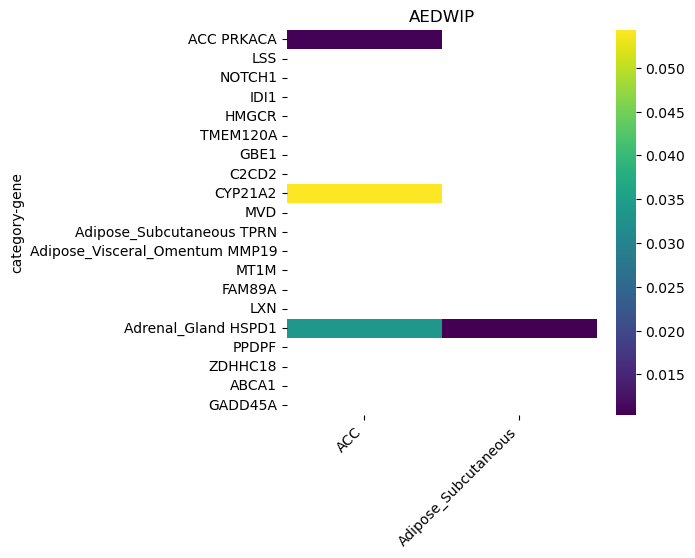

In [25]:
%%time
# Create some test data

testDF = scaledOrderedSignatureGenesDF.head( n=20 ).loc[:, ["ACC",	"Adipose_Subcutaneous"] ]
display( testDF )

# find values bellow our threshold
threshold = 0.01 # do not display zeros
hideMaskDF = testDF < threshold
title = f'AEDWIP'
plotHeatMapSeaborn( testDF, title,  width=5, height=5, hideMaskDF=hideMaskDF)

In [26]:
# testDF.index.names 

In [27]:
# 'Adipose_Subcutaneous-TPRN'.split("-")

In [28]:
# # currentCat = None
# currentCat = 'Adipose_Subcutaneous'
# if 'Adipose_Subcutaneous-TPRN'.split("-")[0] == currentCat :
#     print("equal")
# else:
#     print('Adipose_Subcutaneous-TPRN'.split("-")[0])


In [29]:
# c,g = 'Adipose_Subcutaneous-TPRN'.split("-")
# print(c)
# print(g)

In [30]:
# maxStrLen = 0
# for c,g in testDF.index.values:
#     l = len(c) + len(g)
#     if l > maxStrLen :
#         maxStrLen = l
#         print( f'max {maxStrLen} {c} {g}')
    

In [31]:
# maxStrLen = 0
# for c,g in testDF.index.values:
#     l = len(c) + len(g)
#     if l > maxStrLen :
#         maxStrLen = l
#         print( f'max {maxStrLen} {c} {g}')
        
# maxStrLen = 30
# for c,g in testDF.index.values:
#     padding = abs(maxStrLen - len(c) - len(g))
#     print(f'\nabs padding : {padding}')
#     padding = max(padding, 1)
#     print(f'padding : {padding}')
#     print(f'{c}{" " * padding}{g}' )


In [32]:
# # find max string width
# strLen = 0
# for category, gene in scaledOrderedSignatureGenesDF.index :
#     # print(f'{i} {category}, {gene}')
#     l = len(category.strip()) + len( gene.strip() ) + 1
#     if l > strLen:
#         strLen = l

# print(f'strLen : {strLen}')

# newLabels = []
# currentCategory = None
# for category, gene in scaledOrderedSignatureGenesDF.index :
#     category = category.strip()
#     gene = gene.strip()

#     if category == currentCategory :
#         padding = abs( strLen - len(gene) )                
#         fmt = f'{" " * padding}{gene}'
#     else:
#         currentCategory = category
#         padding = abs( strLen - len(category) - len(gene) )        
#         fmt = f'{currentCategory}{" " * padding}{gene}'

#     newLabels.append( fmt )



# for x in newLabels:
#     print(x)